In [2]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient,eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))    

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


In [4]:
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3
# 输入张量被展平时的总元素数量
input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

# *input_shape 把元组解开
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[1.49834967, 1.70660132, 1.91485297],
                         [3.25553199, 3.5141327, 3.77273342]])

print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769848888397517e-10


In [5]:
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
# 随机生成分数矩阵
dout = np.random.randn(10, 5)
# 用分数矩阵反向计算 x，w，b 对于最后分数矩阵的影响
dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
print('db_num:')
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)


_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

db_num:
Testing affine_backward function:
dx error:  1.0908199508708189e-10
dw error:  2.1752635504596857e-10
db error:  7.736978834487815e-12


In [6]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3,4)
out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print('Testing relu_forward function: ')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function: 
difference:  4.999999798022158e-08


In [7]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape) # 将横纵坐标这个元组拆开传递给每一个参数

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)
_, cache = relu_forward(x)
dx = relu_backward(dout,cache)

print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


In [8]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))


Testing affine_relu_forward and affine_relu_backward:
dx error:  6.395535042049294e-11
dw error:  8.162015570444288e-11
db error:  7.826724021458994e-12


# Loss layers: Softmax and SVM
Now implement the loss and gradient for softmax and SVM in the `softmax_loss` and `svm_loss` function in `cs231n/layers.py`. These should be similar to what you implemented in `cs231n/classifiers/softmax.py` and `cs231n/classifiers/linear_svm.py`.

You can make sure that the implementations are correct by running the following:

In [9]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

print('Testing svm_loss')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

print('\n Testing softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing svm_loss
loss:  8.999602749096233
dx error:  1.4021566006651672e-09

 Testing softmax_loss:
loss:  2.302545844500738
dx error:  9.384673161989355e-09


# Two-layer network
Open the file `cs231n/classifiers/fc_net.py` and complete the implementation of the `TwoLayerNet` class. Read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [10]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])

loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 1.53e-08
W2 relative error: 3.37e-10
b1 relative error: 8.01e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.35e-08
b2 relative error: 1.97e-09


# Solver
Open the file `cs231n/solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves about `36%` accuracy on the validation set.

In [11]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = None

solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                      'learning_rate': 1e-4,
                    },
                    lr_decay=0.95,
                    num_epochs=5, batch_size=200,
                    print_every=100)
solver.train()
solver.check_accuracy(data['X_val'], data['y_val'])

(Iteration 1 / 1225) loss: 2.301725
(Epoch 0 / 5) train acc: 0.145000; val_acc: 0.140000
(Iteration 101 / 1225) loss: 2.241923
(Iteration 201 / 1225) loss: 2.187425
(Epoch 1 / 5) train acc: 0.267000; val_acc: 0.243000
(Iteration 301 / 1225) loss: 2.056790
(Iteration 401 / 1225) loss: 1.937978
(Epoch 2 / 5) train acc: 0.294000; val_acc: 0.303000
(Iteration 501 / 1225) loss: 1.924555
(Iteration 601 / 1225) loss: 1.933743
(Iteration 701 / 1225) loss: 1.832777
(Epoch 3 / 5) train acc: 0.336000; val_acc: 0.315000
(Iteration 801 / 1225) loss: 1.960827
(Iteration 901 / 1225) loss: 1.832752
(Epoch 4 / 5) train acc: 0.340000; val_acc: 0.350000
(Iteration 1001 / 1225) loss: 1.739182
(Iteration 1101 / 1225) loss: 1.940517
(Iteration 1201 / 1225) loss: 1.848443
(Epoch 5 / 5) train acc: 0.355000; val_acc: 0.373000


0.373

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.36 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.
 
Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

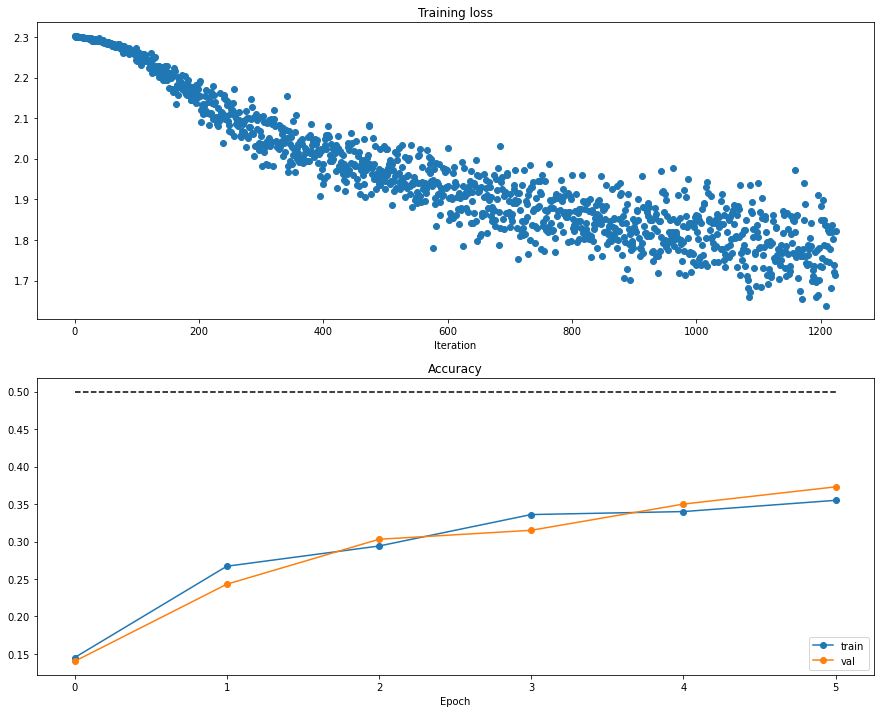

In [12]:
# Run this cell to visualize training loss and train / val accuracy 

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

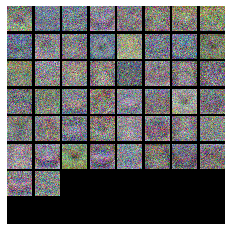

In [13]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [17]:
best_model = None
best_val_acc = -1
best_hidden_size = -1
best_learning_rate = -1
best_batch_size = -1
best_reg = -1
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_model.                                                          #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on thexs previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

learning_rates = [(1 + i) * 1e-4 for i in range(0,5)]
hidden_sizes = [(1 + i) * 50 for i in range(0,5)]
batch_sizes = [(1 + i) * 100 for i in range(0,5)]
# regularization_strengths = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0]
regularization_strengths = [1e-4, 1e-3, 1e-2]

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for reg in regularization_strengths:
                print('Training with hidden size: %d , learning rate: %e , batch size: %d and reg: %e' % (hidden_size, learning_rate, batch_size, reg))
                model = TwoLayerNet(input_size, hidden_size, num_classes, reg)
                solver = Solver(model, data,
                                update_rule='sgd',
                                optim_config={
                                    'learning_rate': learning_rate
                                },
                                lr_decay=0.95,
                                num_epochs=5,
                                batch_size=batch_size,
                                print_every = 500
                                )
                solver.train()
                if solver.best_val_acc > best_val_acc:
                    best_val_acc = solver.best_val_acc
                    best_model = model
                    best_hidden_size = hidden_size
                    best_learning_rate = learning_rate
                    best_batch_size = batch_size
                    best_reg = reg
print('Best of all validation accuracy: %f, with hidden size: %d , learning rate: %e , batch size: %d and reg: %e' % (best_val_acc, hidden_size, learning_rate, batch_size, reg))
# Best of all validation accuracy: 0.496000, with hidden size: 150 , learning rate: 3.000000e-04 , batch size: 300 and reg: 1.000000e-02
# Best of all validation accuracy: 0.513000, with hidden size: 250 , learning rate: 5.000000e-04 , batch size: 500 and reg: 1.000000e-02
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Training with hidden size: 50 , learning rate: 1.000000e-04 , batch size: 100 and reg: 1.000000e-04
(Iteration 1 / 2450) loss: 2.302595
(Epoch 0 / 5) train acc: 0.105000; val_acc: 0.110000
(Epoch 1 / 5) train acc: 0.238000; val_acc: 0.230000
(Iteration 501 / 2450) loss: 2.052613
(Epoch 2 / 5) train acc: 0.282000; val_acc: 0.290000
(Iteration 1001 / 2450) loss: 1.830258
(Epoch 3 / 5) train acc: 0.357000; val_acc: 0.346000
(Iteration 1501 / 2450) loss: 1.756226
(Epoch 4 / 5) train acc: 0.357000; val_acc: 0.375000
(Iteration 2001 / 2450) loss: 1.682603
(Epoch 5 / 5) train acc: 0.419000; val_acc: 0.381000
Training with hidden size: 50 , learning rate: 1.000000e-04 , batch size: 100 and reg: 1.000000e-03
(Iteration 1 / 2450) loss: 2.303926
(Epoch 0 / 5) train acc: 0.090000; val_acc: 0.110000
(Epoch 1 / 5) train acc: 0.284000; val_acc: 0.304000
(Iteration 501 / 2450) loss: 1.961186
(Epoch 2 / 5) train acc: 0.363000; val_acc: 0.361000
(Iteration 1001 / 2450) loss: 1.904997
(Epoch 3 / 5) train

In [18]:
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
# Validation set accuracy:  0.496
# Validation set accuracy:  0.513

Validation set accuracy:  0.513


In [19]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())
# Test set accuracy:  0.527
# Test set accuracy:  0.506

Test set accuracy:  0.506


## Inline Question 2: 

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

